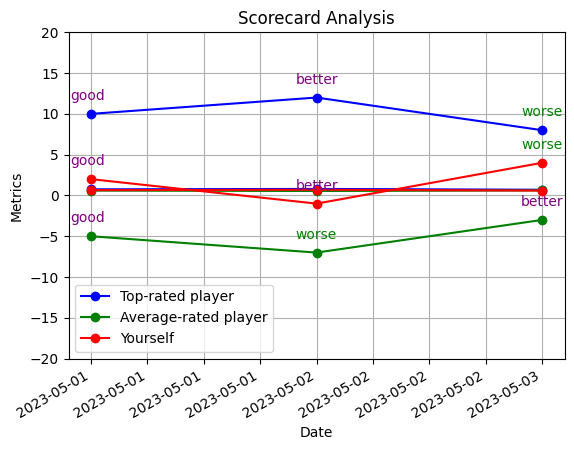

In [12]:
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, date2num
import numpy as np
from datetime import datetime

# Sample data for the scorecard analysis
player_data = {
    'Top-rated player': [
        {'date': '2023-05-01', 'win_lose_ratio': 0.75, 'score_difference': 10},
        {'date': '2023-05-02', 'win_lose_ratio': 0.8, 'score_difference': 12},
        {'date': '2023-05-03', 'win_lose_ratio': 0.7, 'score_difference': 8},
        # Add more data points as needed
    ],
    'Average-rated player': [
        {'date': '2023-05-01', 'win_lose_ratio': 0.6, 'score_difference': -5},
        {'date': '2023-05-02', 'win_lose_ratio': 0.55, 'score_difference': -7},
        {'date': '2023-05-03', 'win_lose_ratio': 0.62, 'score_difference': -3},
        # Add more data points as needed
    ],
    'Yourself': [
        {'date': '2023-05-01', 'win_lose_ratio': 0.65, 'score_difference': 2},
        {'date': '2023-05-02', 'win_lose_ratio': 0.7, 'score_difference': -1},
        {'date': '2023-05-03', 'win_lose_ratio': 0.6, 'score_difference': 4},
        # Add more data points as needed
    ]
}

# Define the performance status values
performance_status = {
    'better': 'worse',
    'worse': 'better',
    'good': 'good'
}

# Create the figure and subplot
fig, ax = plt.subplots()

# Configure date formatting for the x-axis
date_format = DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(date_format)

# Define colors for each player category
colors = {
    'Top-rated player': 'b',
    'Average-rated player': 'g',
    'Yourself': 'r'
}

# Iterate over player categories
for category, data in player_data.items():
    # Extract data for the current player category
    dates = [datetime.strptime(player['date'], '%Y-%m-%d') for player in data]
    dates_num = date2num(dates)
    win_lose_ratio = [player['win_lose_ratio'] for player in data]
    score_difference = [player['score_difference'] for player in data]

    # Plot the candlestick chart
    ax.plot(dates_num, win_lose_ratio, color=colors[category], marker='o', label=category)
    ax.plot(dates_num, score_difference, color=colors[category], marker='o')

    # Add performance status annotation
    for i, date in enumerate(dates_num):
        performance = 'good'
        if i > 0:
            if win_lose_ratio[i] > win_lose_ratio[i - 1]:
                performance = 'worse'
            elif win_lose_ratio[i] < win_lose_ratio[i - 1]:
                performance = 'better'

        ax.annotate(performance_status[performance], xy=(date, score_difference[i]),
                    xytext=(-15, 10), textcoords='offset points',
                    color='g' if performance == 'better' else 'purple')
        
# Set the title and labels for the chart
ax.set_title('Scorecard Analysis')
ax.set_xlabel('Date')
ax.set_ylabel('Metrics')

# Create the legend
ax.legend()

# Set the y-axis limits
ax.set_ylim(-20, 20)

# Set the grid
ax.grid(True)

# Rotate the x-axis labels for better readability
fig.autofmt_xdate()

# Show the plot
plt.show()